# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import numpy as np

df = pd.read_csv('BostonHousing.csv')
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [3]:
# Record your observations here 

# 1. There are 14 numerical observations in the data set.
# 2. There are 506 sets of observations.
# 3. There are no cases in which an observation was not recorded - i.e. there are no null values.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

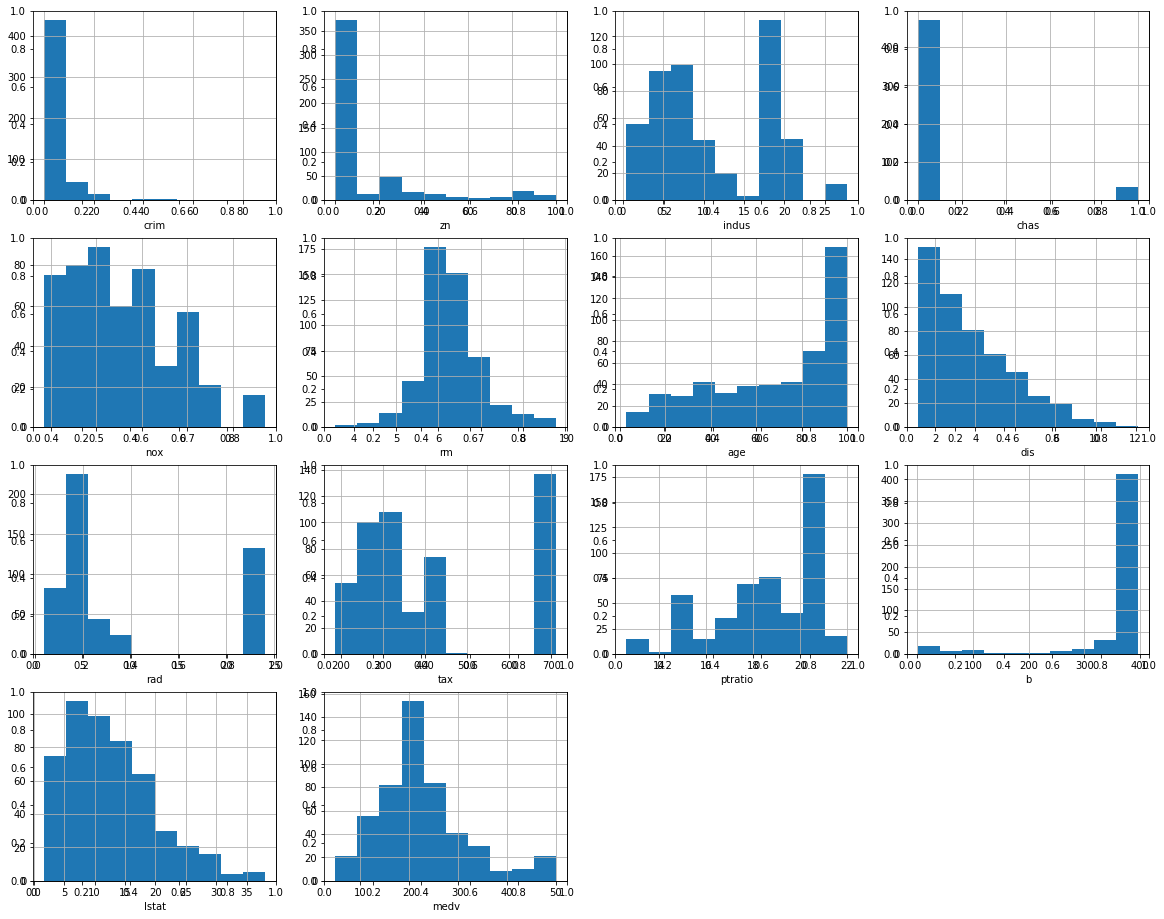

In [4]:
# Your code here
r_w = 20
r_h = 4

c_n = 4
r_n = len(df.columns)/c_n
r_n = int(r_n) + (1 if r_n % int(r_n) != 0 else 0)

%matplotlib inline

fig = plt.figure(figsize=(r_w, r_h*r_n))

axes = fig.subplots(r_n, c_n)

for index, variable in enumerate(df.columns):
    ax = fig.add_subplot(r_n, c_n, index+1)
    df[variable].hist(ax=ax)
    plt.xlabel(variable)

flattened_axes = axes.flatten()
for unused in range(len(flattened_axes)-1, index, -1):
    fig.delaxes(flattened_axes[unused])

In [5]:
# You observations here 

# Distributions of variables are as follows:
#   I. NORMAL
#       a. rm
#       b. mdev (but a few outliers on the right tail)
#   II. SKEWED
#       a. LEFT
#           i. crim
#           ii. chas (this variable is a bit tricky in that there are no occurrences of central values - it still seems to qualify as left-skewed but just "barely")
#           iii. nox
#           iv. dis
#           v. lstat
#       b. RIGHT
#           i. age
#           ii. ptratio (looks like it should be normally distributed but there are significant occurrence of values in the right tail to make it more right-skewed than normal)
#   III. NON-PATTERNED
#       a. zn (looks like it should be left-skewed but there are significant occurrence of values in the right tail which throw off the left-skewness)
#       b. rad
#       c. indus
#       d. b (this looks like it should be right-skewed though it has some significant outliers on the left tail)
#       e. tax

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [6]:
# Your code here
df = df.loc[0:, ['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df.describe()

crim         dis          rm          zn         age        medv
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000
mean     3.613524    3.795043    6.284634   11.363636   68.574901   22.532806
std      8.601545    2.105710    0.702617   23.322453   28.148861    9.197104
min      0.006320    1.129600    3.561000    0.000000    2.900000    5.000000
25%      0.082045    2.100175    5.885500    0.000000   45.025000   17.025000
50%      0.256510    3.207450    6.208500    0.000000   77.500000   21.200000
75%      3.677082    5.188425    6.623500   12.500000   94.075000   25.000000
max     88.976200   12.126500    8.780000  100.000000  100.000000   50.000000

### Check for linearity assumption for all chosen features with target variable using scatter plots

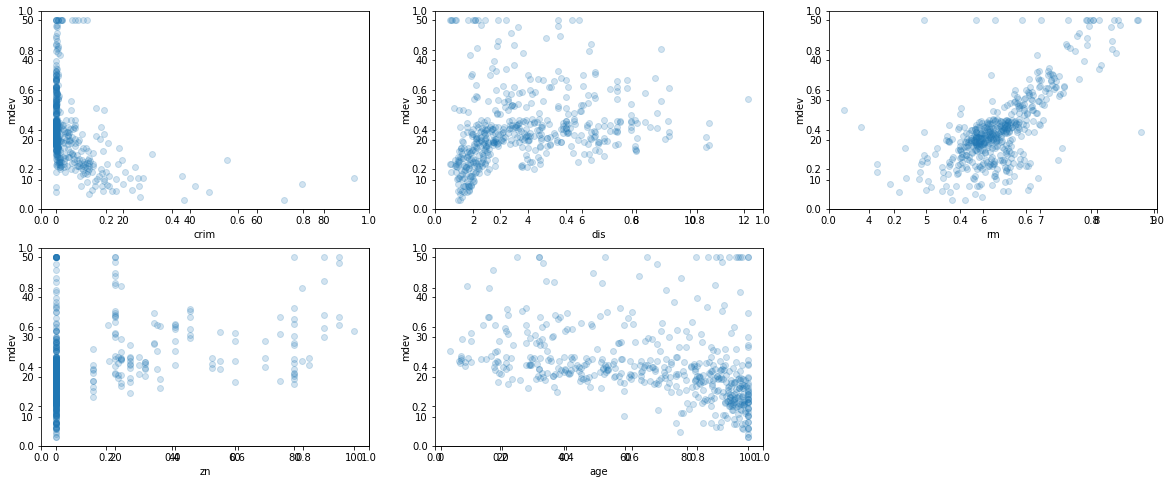

In [7]:
# Your code here

r_w = 20
r_h = 4

c_n = 3
r_n = len(df.columns)/c_n
r_n = int(r_n) + (1 if r_n % int(r_n) != 0 else 0)

fig = plt.figure(figsize=(r_w, r_h*r_n))

axes = fig.subplots(r_n, c_n)

for index, indep in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    ax = fig.add_subplot(r_n, c_n, index+1)
    plt.scatter(df[indep], df['medv'], alpha=0.2)
    plt.xlabel(indep)
    plt.ylabel('mdev')

flattened_axes = axes.flatten()
for unused in range(len(flattened_axes)-1, index, -1):
    fig.delaxes(flattened_axes[unused])

In [8]:
# Your observations here

# Linear Relationships Observations:
#   1. medv ~ crim: no relationship is evident
#   2. medv ~ dis: positive linear relationship might exist
#   3. medv ~ rm: positive linear relationship appears to exist
#   4. mev ~ zn: positive linear relationship seems like it might exist
#   5. medv ~ age: negative linear relationship might exist

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

<Figure size 432x432 with 0 Axes>

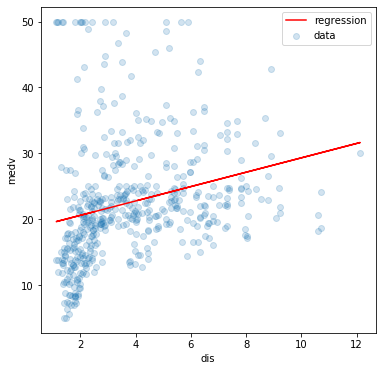

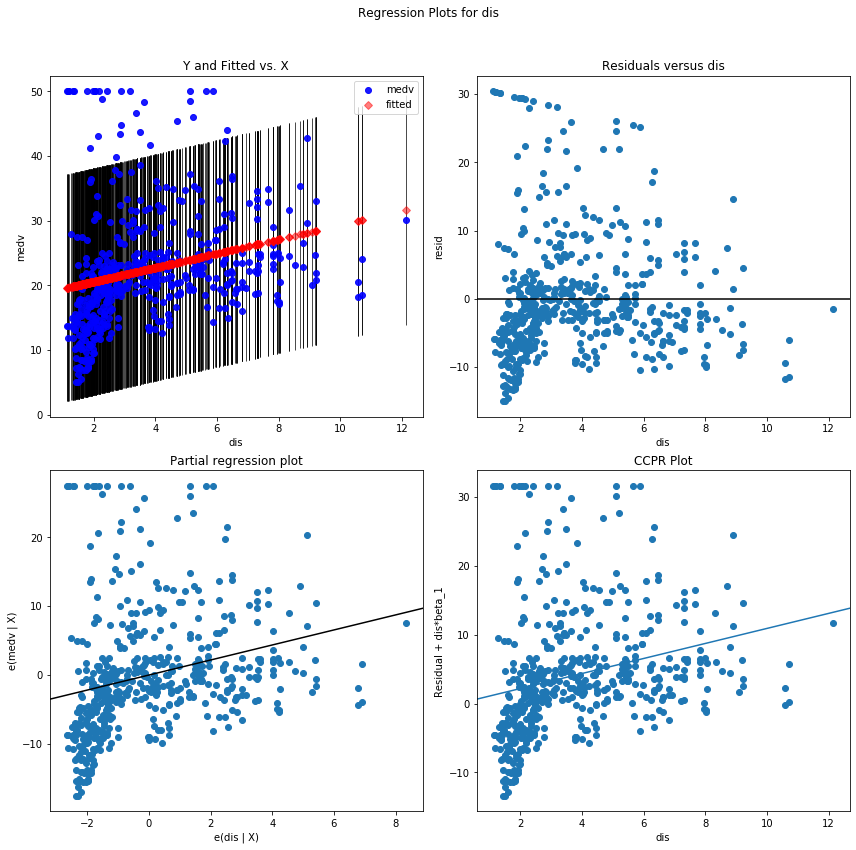

<Figure size 432x432 with 0 Axes>

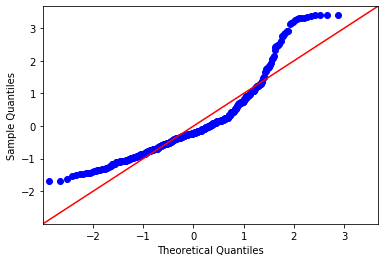

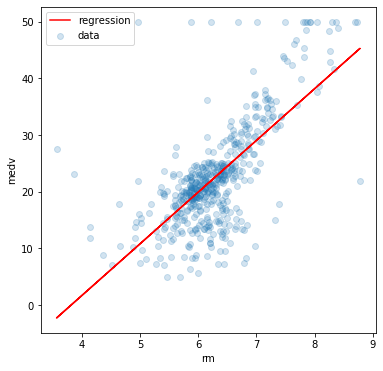

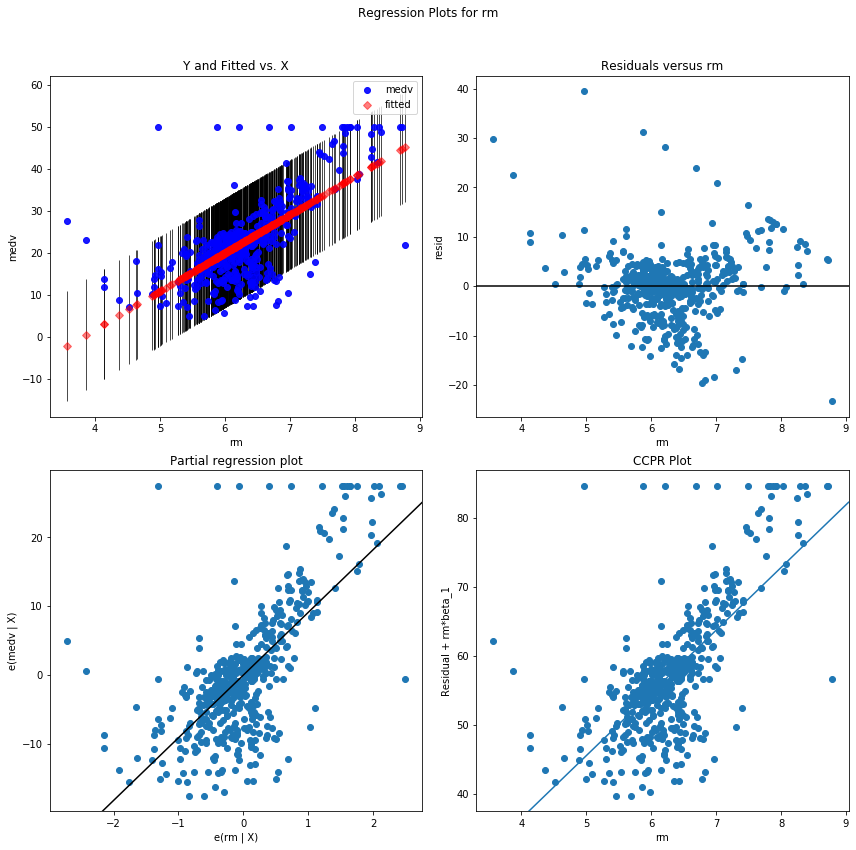

<Figure size 432x432 with 0 Axes>

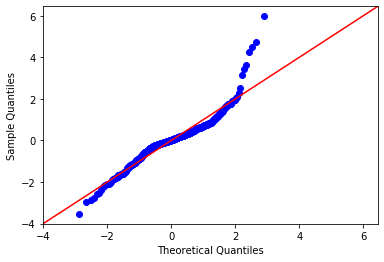

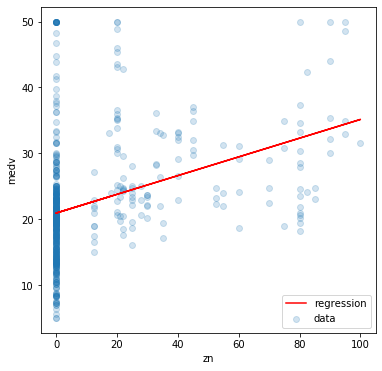

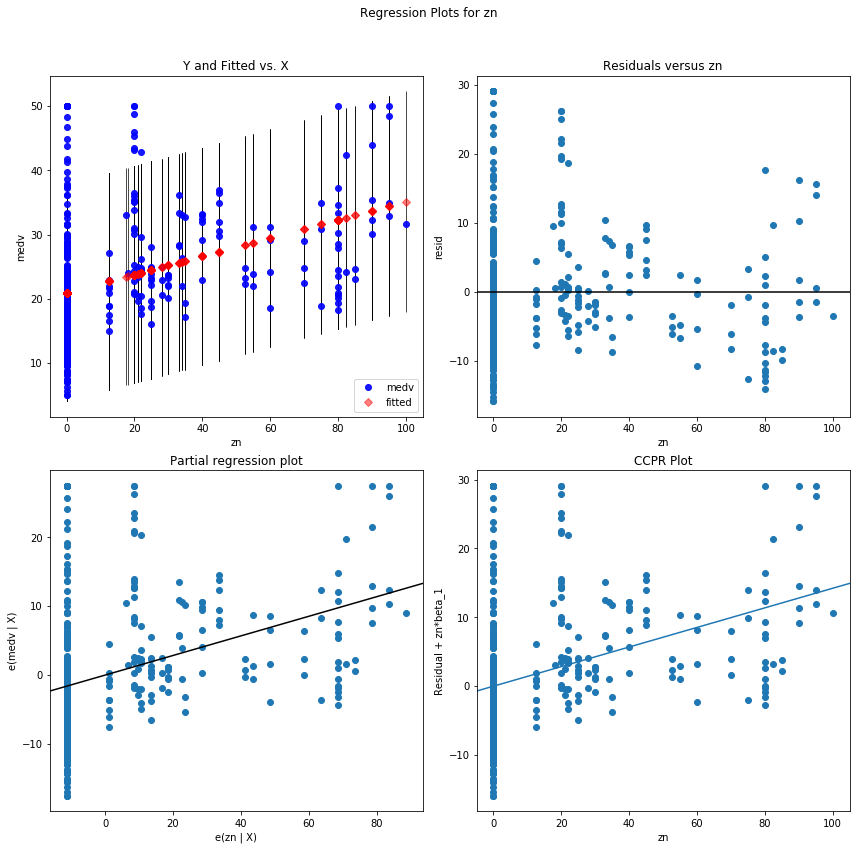

<Figure size 432x432 with 0 Axes>

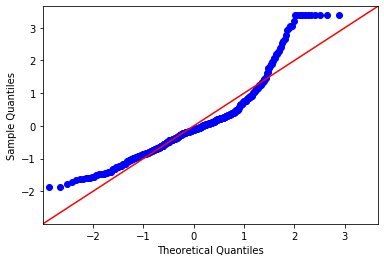

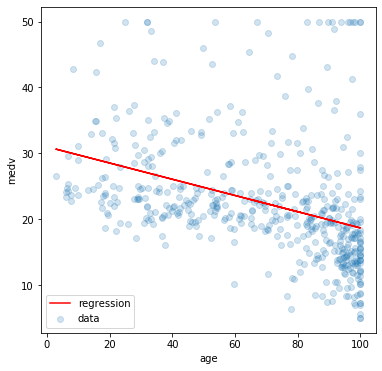

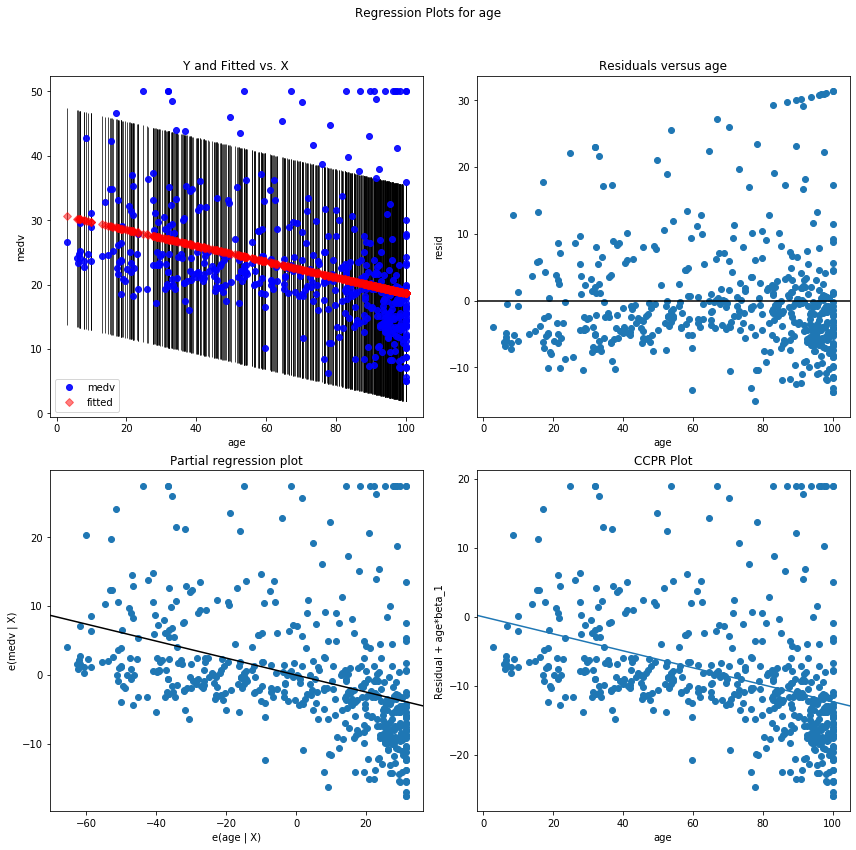

<Figure size 432x432 with 0 Axes>

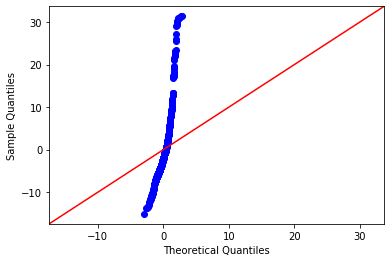

In [9]:
# Your code here

from statsmodels.formula.api import ols

dep = 'medv'
indeps = ['crim', 'dis', 'rm', 'zn', 'age']

results = []

fs_edge = 6
for index, indep in enumerate(indeps):
    plt.figure(figsize=(fs_edge, fs_edge))
    plt.scatter(df[indep], df[dep], alpha=0.2)
    # Run a simple OLS regression between independent and dependent variables
    f = dep + '~' + indep
    model = ols(formula=f, data=df)
    model_fit_results = model.fit()
    # Plot a regression line on the scatter plots
    df_indep_min_max = pd.DataFrame(np.array([df[indep].min(), df[indep].max()]), columns=[indep])
    # make predictions for those x values and store them
    df_dep_predicted_from_min_max_indep = pd.DataFrame(model_fit_results.predict(df_indep_min_max), columns=[dep])
    #plot the observed data and the least squares line
    reg_line = model_fit_results.predict()
    plt.plot(df[indep], reg_line, color='red')
    
    plt.xlabel(indep)
    plt.ylabel(dep)
    plt.legend(['regression', 'data'])

    # Plot the residuals using sm.graphics.plot_regress_exog()
    fig = plt.figure(figsize=(2*fs_edge,2*fs_edge))
    sm.graphics.plot_regress_exog(model_fit_results, indep, fig=fig)

    # Plot a Q-Q plot for regression residuals normality test
    plt.figure(figsize=(fs_edge, fs_edge))
    sm.graphics.qqplot(model_fit_results.resid, dist=stats.norm, line='45', fit=True);

    #name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
    jbtest = sms.jarque_bera(model_fit_results.resid)

    # append results
    results.append(
        [
            indep
            , model_fit_results.rsquared
            , model_fit_results.params[0]   # intercept
            , model_fit_results.params[1]   # slope
            , model_fit_results.pvalues[1]  # p-value for indep
            , jbtest[0]
        ]
    )

In [10]:
pd.DataFrame(results, columns=['Independent Variable', 'R-squared', 'Intercept', 'Slope', 'P-value', 'Normality (JB)'])

Independent Variable  R-squared  Intercept     Slope       P-value  \
0                 crim   0.150780  24.033106 -0.415190  1.173987e-19   
1                  dis   0.062464  18.390088  1.091613  1.206612e-08   
2                   rm   0.483525 -34.670621  9.102109  2.487229e-74   
3                   zn   0.129921  20.917579  0.142140  5.713584e-17   
4                  age   0.142095  30.978678 -0.123163  1.569982e-18   

   Normality (JB)  
0      295.403720  
1      305.104165  
2      612.448985  
3      262.387500  
4      456.983434

In [11]:
#Your observations here 

# We are obviously given the punch-line below this cell.
#   But we see that R-squared is horrible for all variables, with the best being rm at 0.48.
#   This is much less than desired but of all variables, rm is the best predictor.

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.